# Traditional Algorithm Trading Strategy    

### 모멘텀과 추세 추종 트레이딩 전략 구축

모멘텀 전략의 예시로는 이동평균교차, 이중 이동평균 크로스오버, 거북 트레이딩이 있다.
이중 이동평균 크로스오버와 거북 트레이딩 전략을 구현해 본다.

In [1]:
!pip install finance-datareader


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

start_date = '2001-01-01'
end_date = '2021-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)

### 이중 이동 평균 크로스오버

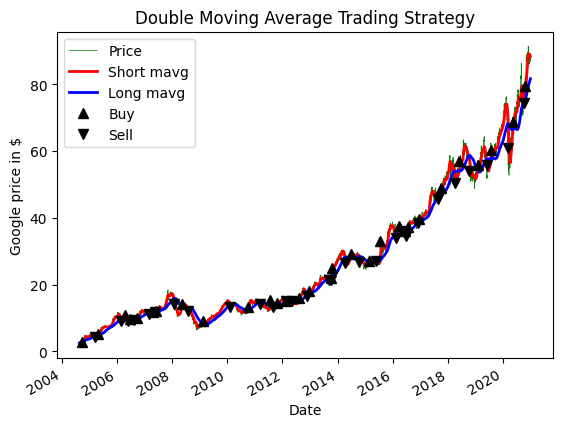

In [3]:
# 이중 이동 평균 크로스오버

def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['Close'].\
        rolling(window=short_window,
                min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['Close'].\
        rolling(window=long_window,
                min_periods=1, center=False).mean()
    signals['signal'][short_window:] =\
        np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

ts=double_moving_average(goog_data,20,100)


# 이중 이동 전략의 주문을 나타내는 그래프.
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)

ax1.plot(ts.loc[ts.orders== 1.0].index,
         goog_data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         goog_data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')

plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Double Moving Average Trading Strategy")

plt.show()

### 모멘텀 기반의 기초 전략

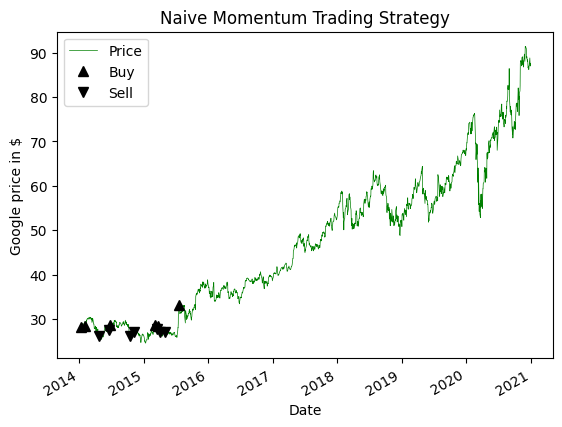

SystemExit: 0

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
# 모멘텀을 기반으로 한 초보적 전략의 예시.
start_date = '2014-01-01'
end_date = '2021-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)


def naive_momentum_trading(financial_data, nb_conseq_days):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    cons_day=0
    prior_price=0
    init=True
    for k in range(len(financial_data['Adj Close'])):
        price=financial_data['Adj Close'][k]
        if init:
            prior_price=price
            init=False
        elif price>prior_price:
            if cons_day<0:
                cons_day=0
            cons_day+=1
        elif price<prior_price:
            if cons_day>0:
                cons_day=0
            cons_day-=1
        if cons_day==nb_conseq_days:
            signals['orders'][k]=1
        elif cons_day == -nb_conseq_days:
            signals['orders'][k]=-1


    return signals


ts=naive_momentum_trading(goog_data, 5)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)

ax1.plot(ts.loc[ts.orders== 1.0].index,
         goog_data["Adj Close"][ts.orders == 1],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         goog_data["Adj Close"][ts.orders == -1],
         'v', markersize=7, color='k')

plt.legend(["Price","Buy","Sell"])
plt.title("Naive Momentum Trading Strategy")

plt.show()



import sys
sys.exit(0)

### 거북 전략 구현

In [6]:
# 주문을 늘리기 위한 거북 전략.
# 가격이 마지막 window_size일 동안 최고 가격에 도달하면 롱 시그널. 최저점에 도달하면 숏 시그널.

start_date = '2001-01-01'
end_date = '2021-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)

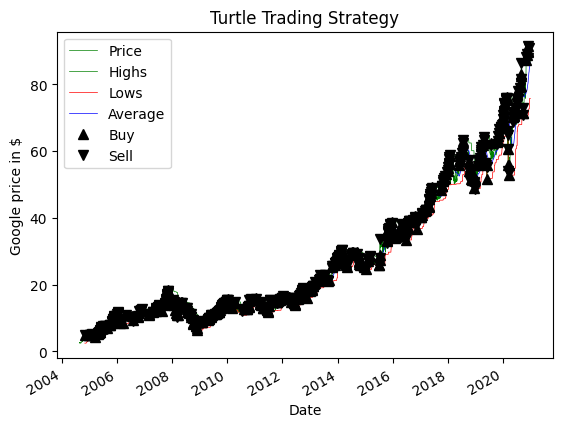

SystemExit: 0

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
def turtle_trading(financial_data, window_size):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    # window_size-days high
    signals['high'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).max()
    # window_size-days low
    signals['low'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).min()
    # window_size-days mean
    signals['avg'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).mean()

    # entry rule : stock price > the higest value for window_size day
    #              stock price < the lowest value for window_size day

    signals['long_entry'] = financial_data['Adj Close'] > signals.high
    signals['short_entry'] = financial_data['Adj Close'] < signals.low

    #exit rule : the stock price crosses the mean of past window_size days.

    signals['long_exit'] = financial_data['Adj Close'] < signals.avg
    signals['short_exit'] = financial_data['Adj Close'] > signals.avg

    init=True
    position=0
    for k in range(len(signals)):
        if signals['long_entry'][k] and position==0:
            signals.orders.values[k] = 1
            position=1
        elif signals['short_entry'][k] and position==0:
            signals.orders.values[k] = -1
            position=-1
        elif signals['short_exit'][k] and position>0:
            signals.orders.values[k] = -1
            position = 0
        elif signals['long_exit'][k] and position < 0:
            signals.orders.values[k] = 1
            position = 0
        else:
            signals.orders.values[k] = 0

    return signals

ts=turtle_trading(goog_data, 50)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["high"].plot(ax=ax1, color='g', lw=.5)
ts["low"].plot(ax=ax1, color='r', lw=.5)
ts["avg"].plot(ax=ax1, color='b', lw=.5)


ax1.plot(ts.loc[ts.orders== 1.0].index,
         goog_data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         goog_data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')


#
# ax1.plot(ts.loc[ts.long_entry== True].index,
#          goog_data["Adj Close"][ts.long_entry== True],
#          '^', markersize=7, color='k')
#
# ax1.plot(ts.loc[ts.short_entry== True].index,
#          goog_data["Adj Close"][ts.short_entry== True],
#          'v', markersize=7, color='k')
#
# ax1.plot(ts.loc[ts.long_exit == True].index,
#          goog_data["Adj Close"][ts.long_exit == True],
#          'v', markersize=7, color='k')
#
# ax1.plot(ts.loc[ts.short_exit == True].index,
#          goog_data["Adj Close"][ts.short_exit == True],
#          'v', markersize=7, color='k')


plt.legend(["Price","Highs","Lows","Average","Buy","Sell"])
plt.title("Turtle Trading Strategy")

plt.show()


import sys
sys.exit(0)

In [12]:
# You are going to set your initial amount of money you want
# to invest --- here it is 10,000
initial_capital = float(10000.0)

# 위의 'turtle_trading' 함수 정의 부분은 그대로 둠.

ts = turtle_trading(goog_data, 50)

initial_capital = float(10000.0)

# positions을 새로운 데이터프레임으로 생성하고 0으로 초기화
positions = pd.DataFrame(index=ts.index).fillna(0.0)

# 시그널이 1인 경우 MSFT 주식을 10주 매수
# 시그널이 -1인 경우 MSFT 주식을 10주 매도
positions['MSFT'] = 10 * ts['orders']

# positions을 사용하여 포트폴리오를 계산
portfolio = positions.multiply(goog_data['Adj Close'], axis=0)

# 'holdings' 열을 포트폴리오에 추가
portfolio['holdings'] = (positions.multiply(goog_data['Adj Close'], axis=0)).sum(axis=1)

# positions.diff()를 사용하여 pos_diff를 계산
pos_diff = positions.diff()

# 'cash' 열을 포트폴리오에 추가
# 초기 자본 - (매수 또는 매도에 사용되는 금액)을 계산
portfolio['cash'] = initial_capital - (pos_diff.multiply(goog_data['Adj Close'], axis=0)).sum(axis=1).cumsum()

# 'total' 열을 포트폴리오에 추가하여 보유 자산과 현금 부분을 합산
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# 'returns' 열을 포트폴리오에 추가하여 수익률을 계산
portfolio['returns'] = portfolio['total'].pct_change()

# 포트폴리오의 처음 몇 줄을 출력
print(portfolio)


            MSFT  holdings         cash        total  returns
Date                                                         
2004-08-19   0.0       0.0  10000.00000  10000.00000      NaN
2004-08-20   0.0       0.0  10000.00000  10000.00000      0.0
2004-08-23   0.0       0.0  10000.00000  10000.00000      0.0
2004-08-24   0.0       0.0  10000.00000  10000.00000      0.0
2004-08-25   0.0       0.0  10000.00000  10000.00000      0.0
...          ...       ...          ...          ...      ...
2020-12-24   0.0       0.0  10421.97884  10421.97884      0.0
2020-12-28   0.0       0.0  10421.97884  10421.97884      0.0
2020-12-29   0.0       0.0  10421.97884  10421.97884      0.0
2020-12-30   0.0       0.0  10421.97884  10421.97884      0.0
2020-12-31   0.0       0.0  10421.97884  10421.97884      0.0

[4122 rows x 5 columns]


## 페어 트레이딩
상관관계를 갖는 상품을 파악하고 상관계수 값을 기반으로 거래 시그널 생성.

상관계수 값은 피어슨 계수 Pearson Coefficient 또는 Z-score.

In [14]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ------------------- -------------------- 143.4/294.6 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn
import FinanceDataReader as fdr

'data_source' argument deprecated, use in symbol like these:
  fdr.DataReader('FRED:DEXKOUS', '1990-01-01')
  fdr.DataReader('FRED:DEXKOUS')
  fdr.DataReader('FRED:NASDAQCOM,M2,HSN1F')



In [66]:
# 불러올 주식 종목 심볼 리스트
symbols = ['SPY','AAPL','ADBE','LUV','MSFT','SKYW','QCOM','HPQ','JNPR','AMD','IBM']

# 데이터 불러오기를 위한 기간 설정
start_date = '2001-01-01'
end_date = '2021-12-31'

# 빈 데이터프레임 생성
data = pd.DataFrame()

# 주식 종목 데이터 불러오기 및 Adj Close 열 데이터 가져오기
for symbol in symbols:
    stock_data = fdr.DataReader(symbol, start_date, end_date)
    data[symbol] = stock_data['Adj Close']  # 해당 종목의 이름으로 열 추가

# 데이터프레임 출력
print(data)

                   SPY        AAPL        ADBE        LUV        MSFT       SKYW        QCOM        HPQ        JNPR         AMD         IBM
Date                                                                                                                                       
2001-01-02   84.365425    0.225462   23.221340  19.976847   13.472756  23.294529   23.031401   8.553787   82.004707   14.375000   45.335033
2001-01-03   88.417847    0.248197   28.787937  19.618618   14.889916  24.406305   27.316780   9.631849  105.541672   16.250000   50.580143
2001-01-04   87.466133    0.258618   26.707256  20.747021   15.045225  23.241577   25.651367   9.790910  100.194626   16.687500   49.811764
2001-01-05   84.610992    0.248197   25.589279  20.836569   15.258763  23.506296   23.742252   8.659830   87.801468   16.000000   50.246029
2001-01-08   85.265938    0.251039   24.626575  20.299242   15.200537  22.765100   25.306103   8.871903   92.336494   16.187500   50.012188
...                .

In [67]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

In [69]:
pvalues, pairs = find_cointegrated_pairs(data)
print(pairs)

[('JNPR', 'AMD'), ('JNPR', 'IBM')]


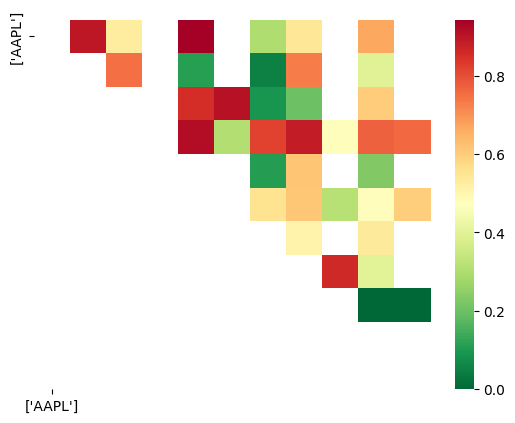

[('JNPR', 'AMD'), ('JNPR', 'IBM')]
                  SPY      AAPL       ADBE        LUV       MSFT       SKYW       QCOM       HPQ        JNPR      AMD        IBM
Date                                                                                                                            
2001-01-02  84.365425  0.225462  23.221340  19.976847  13.472756  23.294529  23.031401  8.553787   82.004707  14.3750  45.335033
2001-01-03  88.417847  0.248197  28.787937  19.618618  14.889916  24.406305  27.316780  9.631849  105.541672  16.2500  50.580143
2001-01-04  87.466133  0.258618  26.707256  20.747021  15.045225  23.241577  25.651367  9.790910  100.194626  16.6875  49.811764


In [70]:
seaborn.heatmap(pvalues, xticklabels=symbolsIds,
                yticklabels=symbolsIds, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()
print (pairs)


print(data.head(3))

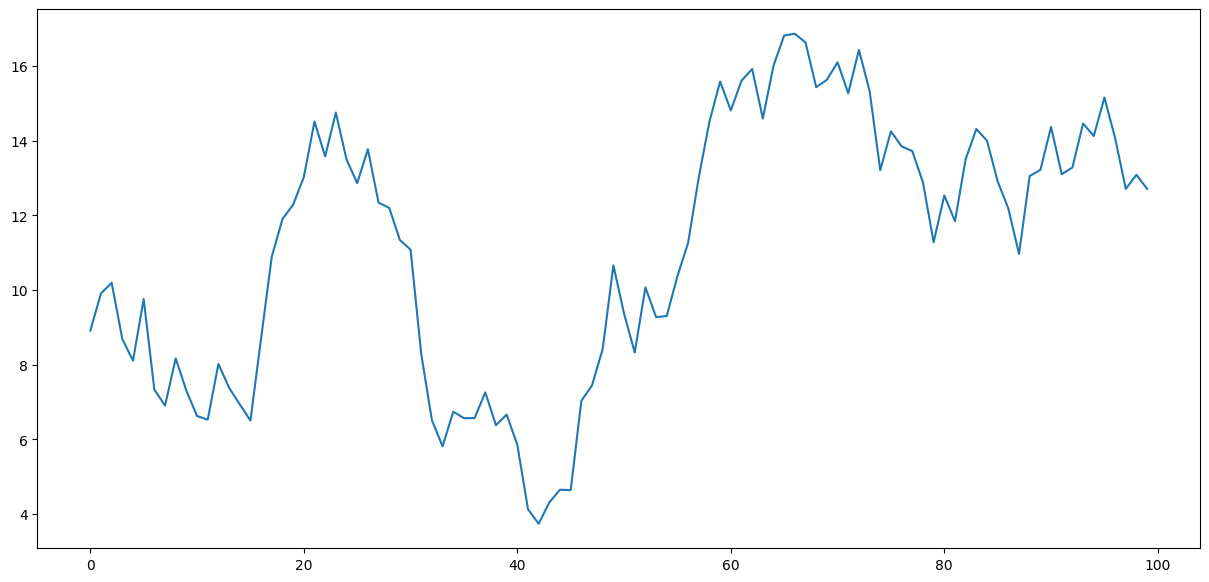

In [71]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# 결과 재현을 위한 시드 값.
np.random.seed(123)

# 심블1의 일일 수익률을 생성
Symbol1_returns = np.random.normal(0, 1, 100)
# 종목의 주가 시리즈를 생성
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns),\
                           name='Symbol1') + 10
Symbol1_prices.plot(figsize=(15,7))
plt.show()

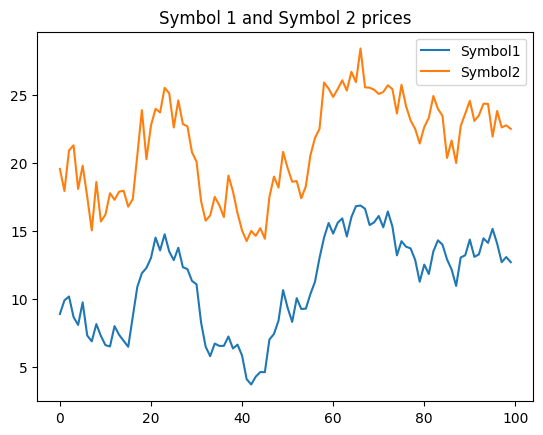

In [72]:
# 심블2의 가격 시리즈를 생성
# 심블1의 행태를 복사
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol2_prices.name = 'Symbol2'

plt.title("Symbol 1 and Symbol 2 prices")
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.legend()
plt.show()

In [73]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)

2.0443244099383593e-13


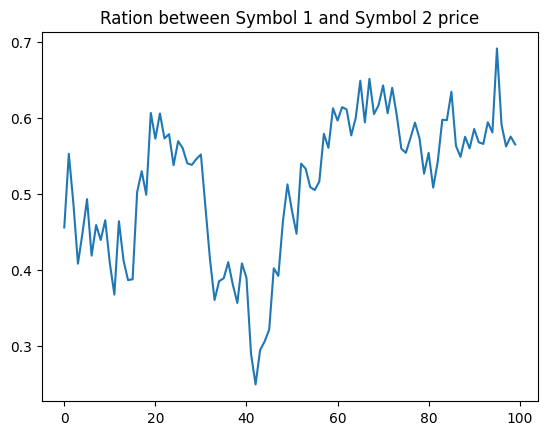

In [74]:
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ration between Symbol 1 and Symbol 2 price")

ratios.plot()
plt.show()

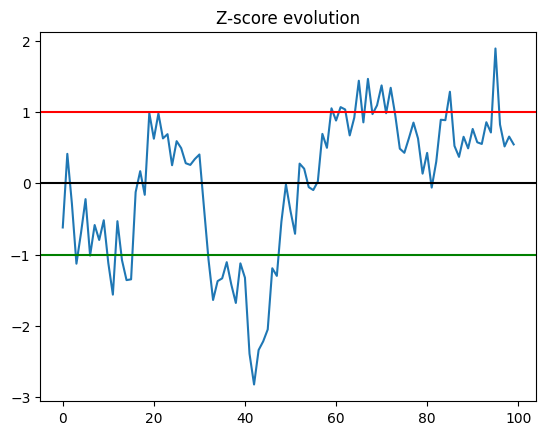

In [75]:
#plt.axhline(ratios.mean())
#plt.legend([' Ratio'])

zscore(ratios).plot()
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

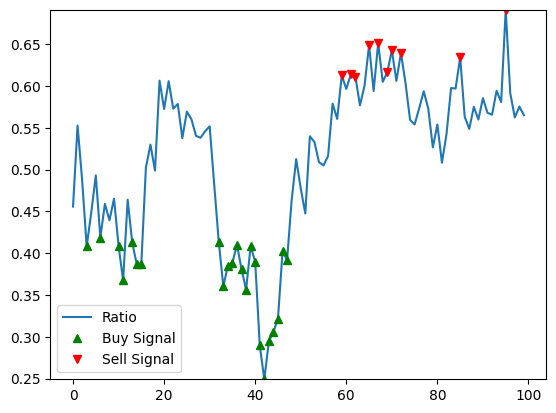

In [76]:
ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

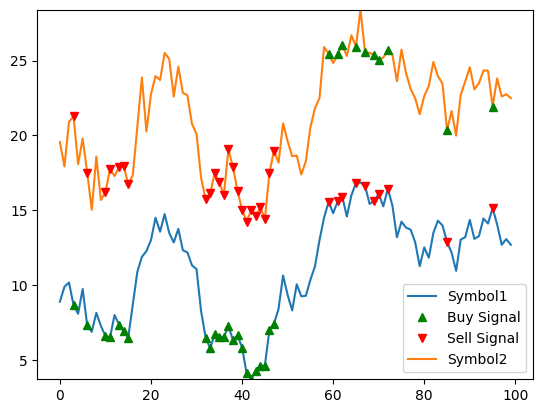

In [77]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot()
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")


x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

### JNPR과 IBM 실제 주가를 이용한 페어 트레이딩

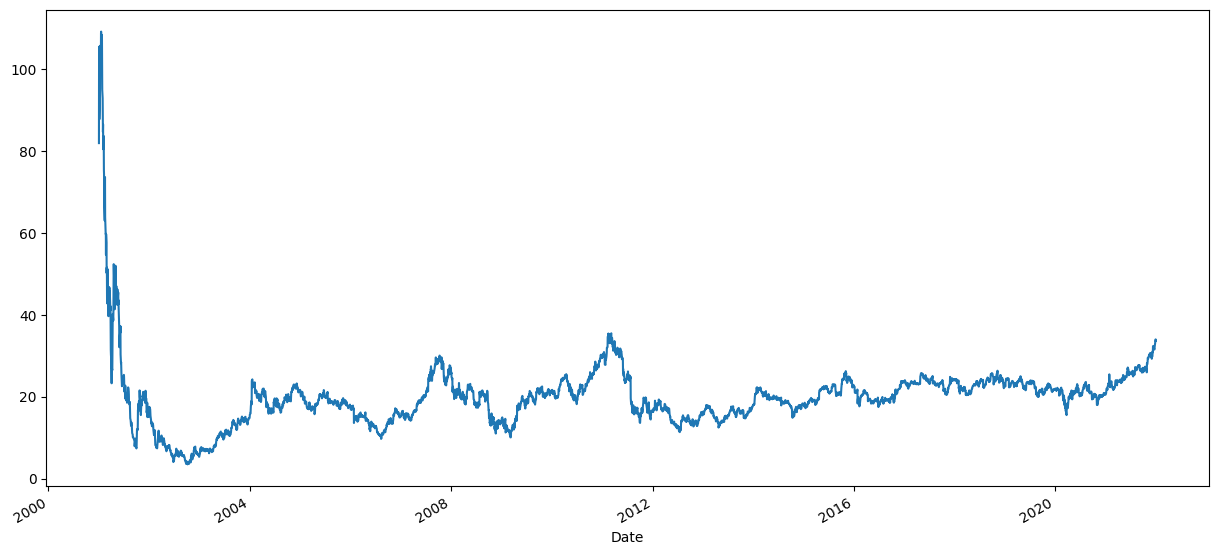

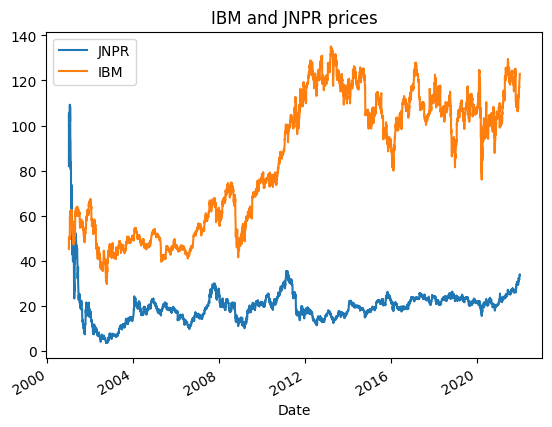

In [80]:
# 이전에 JNPR과 IBM이 공적분 쌍 형태를 띄는 것으로 나타남.
# 해당 두 종목을 이용해 페어트레이딩 전략을 구현

Symbol1_prices = data['JNPR']
Symbol1_prices.plot(figsize=(15,7))
plt.show()
Symbol2_prices = data['IBM']
Symbol2_prices.name = 'IBM'
plt.title("IBM and JNPR prices")
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.legend()
plt.show()
# 이후 이전에 실행한 대로 매수매도 조건 설정 가능.

1.0259644702092533e-11


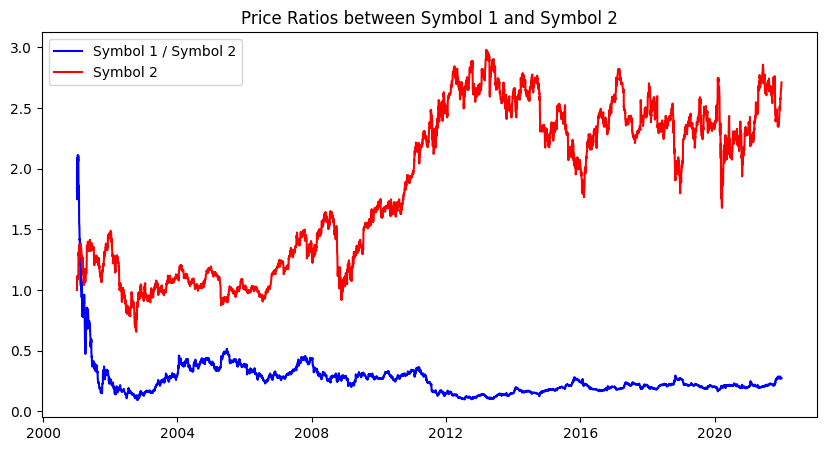

In [84]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
# plt.title("Ration between Symbol 1 and Symbol 2 price")

# ratios.plot()
# plt.show()



plt.figure(figsize=(10, 5))
plt.title("Price Ratios between Symbol 1 and Symbol 2")

plt.plot(Symbol1_prices.index, ratios, label='Symbol 1 / Symbol 2', color='b')
plt.plot(Symbol1_prices.index, Symbol2_prices / Symbol2_prices[0], label='Symbol 2', color='r')

plt.legend()
plt.show()
# Z점수가 -1보다 낮으면 진입 포지션이고, Z점수가 1보다 높으면 청산 포지션이다.

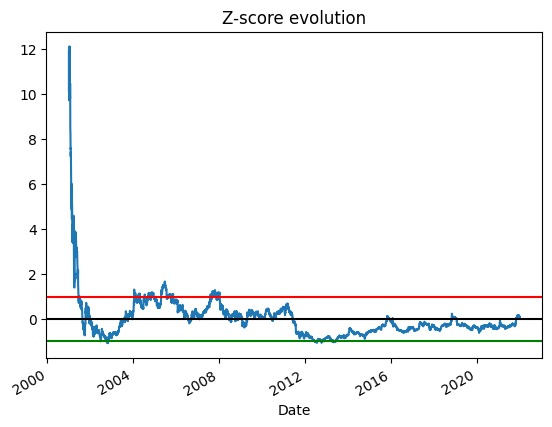

In [85]:
zscore(ratios).plot()
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

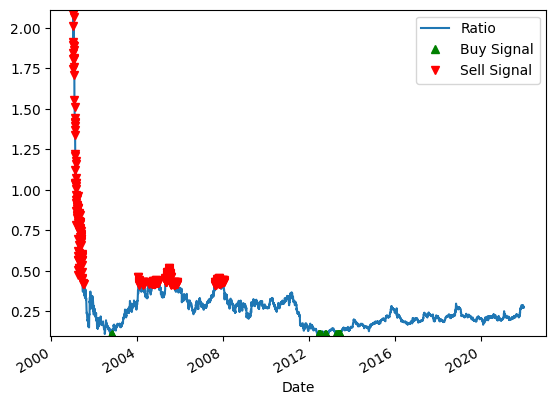

In [86]:
ratios.plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

In [87]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

<Axes: xlabel='Date'>

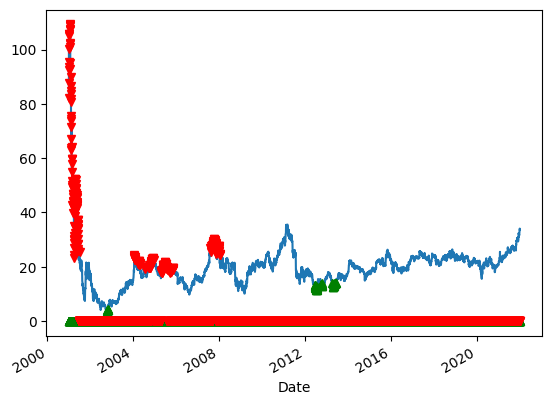

In [88]:
Symbol1_prices.plot()
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

In [89]:
pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))

In [90]:
# 포지션을 1주로 줄여 주문 수를 제한한다.
# 주어진 종목에 대해 롱 포지션을 가질 때 매도 주문만이 허용된다.

position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0

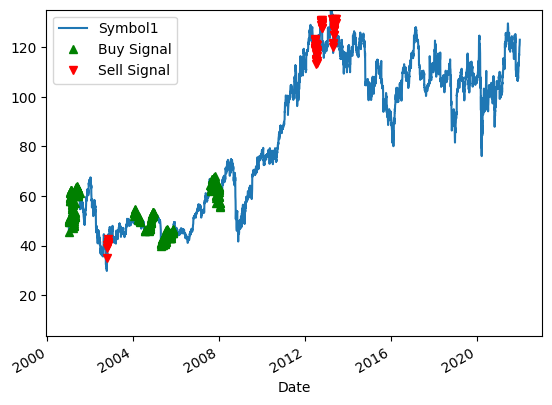

In [91]:
Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

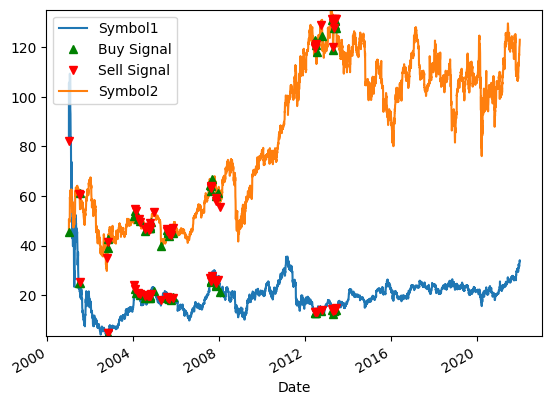

In [92]:
Symbol1_prices.plot()
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,Symbol1_prices.min(),Symbol2_prices.max()))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

In [97]:
pair_correlation_trading_strategy['symbol1_buy'].head()

Date
2001-01-02    0.0
2001-01-03    0.0
2001-01-04    0.0
2001-01-05    0.0
2001-01-08    0.0
Name: symbol1_buy, dtype: float64

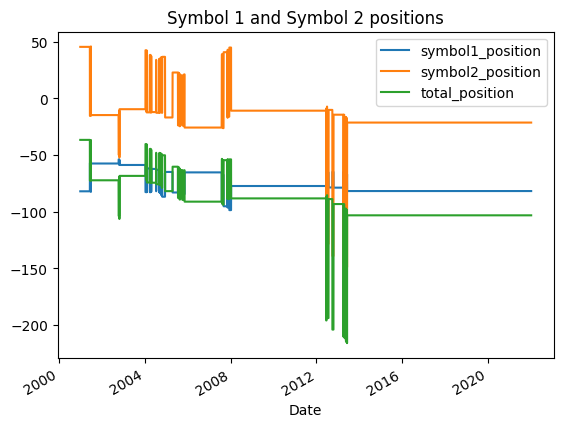

In [98]:
# 페어 상관관계 전략의 손익을 계산
# 심블1 과 심블2 간의 가격이 포함된 벡터 간의 차이를 계산.
# 이후 포지션을 추가해 손익을 나타냄.

pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

### Delta Position

In [99]:
#여기서 부터는 델타 포지션을 나타낸다.
# 포지션을 헤지하는 방법.

pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))

In [100]:
position=0
s1_shares = 1000000
for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0

82.004707 45.335033
105.541672 50.580143
100.194626 49.811764
87.801468 50.246029
92.336494 50.012188
93.698219 49.477665
95.397263 49.945354
105.79155 50.07901
105.141899 50.145821
102.343437 49.577873
108.889854 51.682617
109.239616 57.896564
107.390694 59.466717
101.993629 58.030216
108.477562 58.297428
107.140831 59.032425
101.094131 59.199471
94.94754 61.036907
92.948639 61.460545
89.900322 62.331829
84.703178 59.867638
86.60215 60.963421
80.505508 58.942905
83.753716 59.985226
81.704857 61.038265
75.458328 62.563431
74.408875 61.059662
67.062935 59.935852
63.8647 61.487778
63.065163 60.872383
71.460533 61.594784
73.709274 62.493835
63.964657 61.541286
59.76696 59.668285
59.866932 57.533119
54.744743 58.276943
59.76696 55.654736
57.668121 56.350414
50.259735 54.900188
51.621475 53.460644
49.422695 56.751751
42.863819 54.74498
46.8741 56.141708
51.221695 56.72501
48.723076 57.554474
49.372726 56.976551
43.875763 53.134228
39.72805 51.100693
46.8741 52.652599
45.774704 50.817078
44.

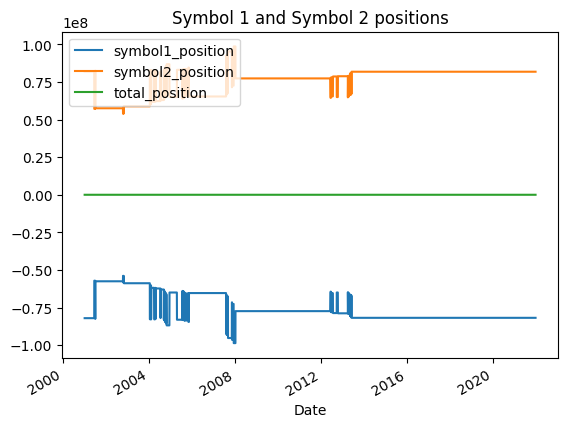

In [101]:
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot()
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

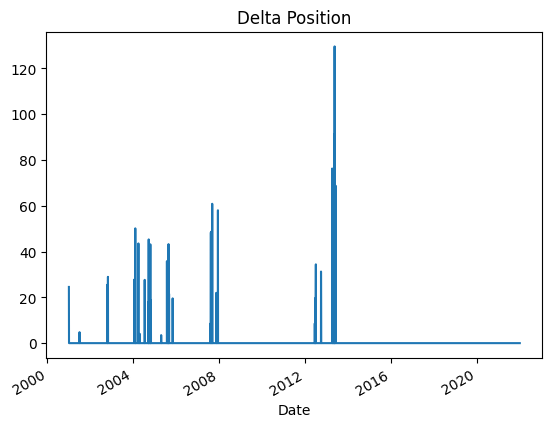

In [102]:
# 델타 포지션을 나타낸다. 최대 금액은 120으로 나타난다.

pair_correlation_trading_strategy['delta'].plot()
plt.title("Delta Position")
plt.show()

모멘텀 전략과 평균 회귀 전략을 구현했다.
다음장에선 통계적 차익거래, 페어 상관관계 등을 구현한다.